<a href="https://colab.research.google.com/github/zbrubaker/portfolio/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Truth Table

The following is a truth table for ```A AND !B```
```
          B 
    |  0  |  1  |
  --|-----------| 
  0 |  0  |  0  |
A --|-----------|
  1 |  1  |  0  |
  --|-----------|
  ```

Now, let's implement this truth table as a Pandas Dataframe, accounting for all possibilities of A and B. 

In [1]:
import pandas as pd

truthTable = pd.DataFrame({'A':[0,1,0,1],
                           'B':[0,0,1,1],
                           'O':[0,1,0,0]})

#Perceptron Training

The following is the implementation of a two input perceptron. A perceptron makes a linear combination of the weights and input values. The result of this linear combination is compared with a threshold value to make a determination. In the context of this problem, the weights will make a linear combination with inputs A and B to determine if the result should be a 0 or a 1. 

First, let's declare some initial values and constants.
  - I initialize the weights to be 0.5 (between 0 and 1).
  - I set the learning rate to be 0.05.
  - We will do 16 iterations of learning.


In [2]:
import statistics
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

#Weights
w = [0.5, 0.5, 0.5]
#Learning Rate
rate = 0.05
#Iterations
n = 16
#Output
output = -1
#Correct Calculations
accuracy = []
temp = []

Now, lets train the perceptron. The perceptron trains by comparing the perceptron result to the expected result. Then, it adjusts the weight according to this comparison and the learning rate in the following formula:
 $$w_i = w_i + learningRate(actualOutput - perceptronOutput) * input_i$$

 This training will run through as many iterations as described above. 

In [3]:
for i in range(0,n):
  for j in range(0,4):
    #Calculate Linear Combination
    result = w[0] * truthTable.A[j] + w[1] * truthTable.B[j] + w[2]
    #Use the Linear Combination to determine the output
    if result > 0.5:
      output = 1
    else:
      output = 0
    #Adjust the weights accordingly
    w[0] = w[0] + rate * (truthTable.O[j] - output) * truthTable.A[j]
    w[1] = w[1] + rate * (truthTable.O[j] - output) * truthTable.B[j]
    w[2] = w[2] + rate * (truthTable.O[j] - output) * 1
    #See how close the output is to the desired result
    temp.append(abs(result - truthTable.O[j]))
  accuracy.append(statistics.mean(temp))
  temp = []

#Results

Now the perceptron is trained. Let's graph the result of the perceptron for all combinations of values A and B between 0 and 1.

The yellow indicates where the perceptron outputs a 1 and the purple indicates where the perceptron outputs a 0. 

<function matplotlib.pyplot.show(*args, **kw)>

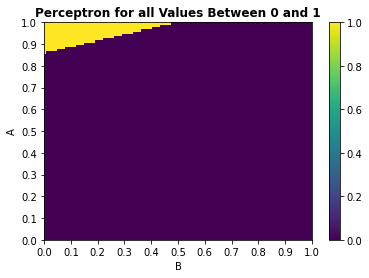

In [4]:
#Declare and set up the inputs
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
griddy = list(product(x,y))
distances = list()

#Use the perceptron weights to make the graph
for v in griddy:
  distances.append((w[0]*v[0] + w[1]*v[1] + w[2]) > 0.5)

#Now plot the graph
distMatrix = np.reshape(distances,(100,100))
heatmap = plt.pcolormesh(x,y,distMatrix)
plt.colorbar(heatmap)
plt.title("Perceptron for all Values Between 0 and 1", fontweight="bold")
plt.xlabel("B")
plt.ylabel("A")
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show

Finally, let's track the accuracy of the perceptron over each iteration. I chose to show error by taking the difference between the result of the linear combination in the perceptron and the target value. There are four of these measurements per iteration, as there are four training samples. The average difference between the result of the linear combination and the target value was found for each iteration and graphed as shown below. 

<ipython-input-5-2995546afc36>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


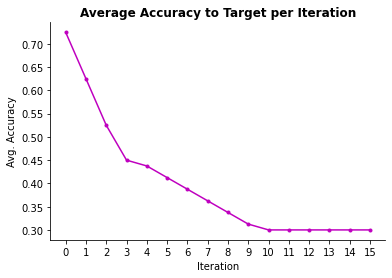

In [5]:
plt.title("Average Accuracy to Target per Iteration", fontweight="bold") 
plt.xlabel("Iteration") 
plt.ylabel("Avg. Accuracy") 
plt.xticks(np.arange(0, 16, step=1))
plt.yticks(np.arange(0, 1, step=0.05))
plt.plot(accuracy,'.-m') 
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In each of the first 10 iterations, the accuracy decreases before bottoming out at 0.30. Therefore, this graph shows the perceptron increasing in accuracy for each of the first 10 iterations. 